In [1]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
from ekpy import control
from ekpy.control.instruments import keysightdsox3024a

In [2]:
rm = control.ResourceManager()
rm.list_resources()

('USB0::0x0957::0x17A6::MY63080078::INSTR', 'GPIB0::8::INSTR')

In [3]:
scope = rm.open_resource('USB0::0x0957::0x17A6::MY63080078::INSTR')

In [4]:
keysightdsox3024a.idn(scope)

'AGILENT TECHNOLOGIES,DSO-X 3024A,MY63080078,02.65.2021030741\n'

In [41]:
keysightdsox3024a.reset(scope)

In [5]:
scope.write(":AUToscale")

12

In [ ]:
keysightdsox3024a.setup(scope)

In [ ]:
bet = keysightdsox3024a.acquire()

In [6]:
scope.write("*CLS")
scope.write("*OPC")

6

In [ ]:
scope.write("chan1:rang 10")

In [ ]:
meows = scope.query("*STB?")
print(meows)

In [6]:
scope.write("*OPC?")

7

In [7]:
keysightdsox3024a.setup_wf(scope, source='CHAN1', byte_order='MSBF', format='WORD')

In [13]:
metadata, time, wfm = keysightdsox3024a.query_wf(scope, 'MSBF')

In [33]:
l1 = np.array([[1,2,3], [69,21]])
l2 = np.array([4,5,9])
l3 = np.concatenate((l1,l2), axis=0)
l3

array([1, 2, 3, 3, 3, 6])

In [12]:
scope.write(":DIG;*CLS") #this function just runs once and acquires one scope screen

11

In [11]:
keysightdsox3024a.setup_wf(scope, source='CHAN1', points='1000')
metadata_1, time_1, wfm_1 = keysightdsox3024a.query_wf(scope)
keysightdsox3024a.setup_wf(scope, source='CHAN2', points='1000')
metadata_2, time_2, wfm_2 = keysightdsox3024a.query_wf(scope)

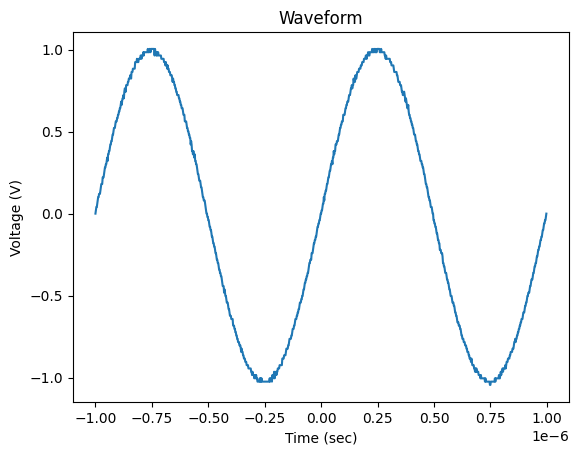

In [10]:
plt.plot(time_1, wfm_1)
plt.title('Waveform')
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (V)')
plt.show()

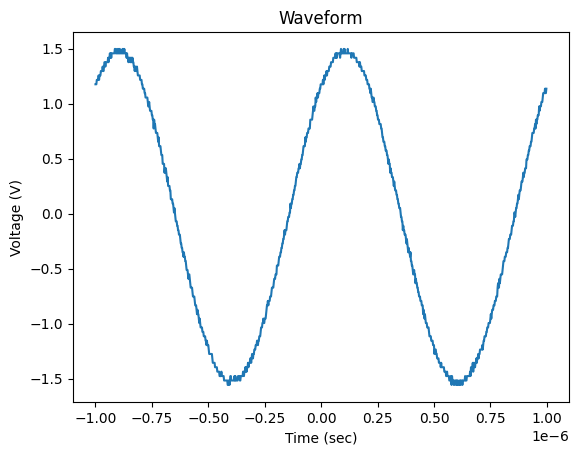

In [36]:
plt.plot(time_2, wfm_2)
plt.title('Waveform')
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (V)')
plt.show()